## Loading the Dataset

In [113]:
import pandas as pd
import numpy as np

In [114]:
df = pd.read_csv('HW3Data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0,2.080754,1.099069,0.927763,1.029081,-0.130763,1.265460,-0.436286,0.728881,2.107979,...,-0.825403,-0.138451,0.382957,0.876697,-0.216234,-1.408300,0.393327,-0.148522,1.591533,-0.217481
1,1,1.109457,0.786453,0.445560,-0.146323,-0.996316,0.555759,0.290734,-0.145259,1.132660,...,-1.056288,-0.205499,-1.815374,0.324373,-1.296909,-0.870757,1.108739,1.094010,-0.492141,-1.554079
2,0,-0.676530,1.693100,1.559247,1.559983,-0.982179,-1.358507,-1.313994,-0.455067,0.295214,...,1.242968,1.230157,-2.038999,2.366093,0.820656,1.404501,0.176860,-0.086285,-0.390878,-0.089465
3,1,0.534396,1.677537,1.489030,0.778605,-0.183776,-1.116850,-1.487557,-0.579511,0.292683,...,0.559852,-0.593149,-4.440577,1.720705,-0.124617,-0.435880,0.228440,-0.893938,1.005879,-0.631247
4,0,-1.018903,0.511080,0.755641,1.013816,0.529899,0.160440,-0.087055,1.295290,0.458736,...,0.227110,0.497628,-0.083921,-0.382733,-0.913389,1.122928,0.834571,-0.283786,-2.860340,0.280871


### Adding headers to the dataset from the text file and checking if there is a need to preprocess the data

In [115]:
genes = np.genfromtxt('Genes.txt',delimiter='\n',dtype = str)
df.columns = np.append('Labels',genes)
df

,Labels,Hsa.3004 H55933 3' UTR 1 203417 H.sapiens mRNA for homologue to yeast ribosomal protein L41.,Hsa.13491 R39465 3' UTR 2a 23933 EUKARYOTIC INITIATION FACTOR 4A (Oryctolagus cuniculus),Hsa.13491 R39465 3' UTR 2a 23933 EUKARYOTIC INITIATION FACTOR 4A (Oryctolagus cuniculus),Hsa.37254 R85482 3' UTR 2a 180093 SERUM RESPONSE FACTOR (Homo sapiens),"Hsa.541 U14973 gene 1 ""Human ribosomal protein S29 mRNA, complete cds. """,Hsa.20836 R02593 3' UTR 2a 124094 60S ACIDIC RIBOSOMAL PROTEIN P1 (Polyorchis penicillatus),Hsa.1977 T51496 3' UTR 1 71488 60S RIBOSOMAL PROTEIN L37A (HUMAN).,Hsa.44472 H80240 3' UTR 2a 240814 INTER-ALPHA-TRYPSIN INHIBITOR COMPLEX COMPONENT II PRECURSOR (Homo sapiens),Hsa.3087 T65938 3' UTR 1 81639 TRANSLATIONALLY CONTROLLED TUMOR PROTEIN (HUMAN);.,...,Hsa.2618 X67699 gene 1 H.sapiens HE5 mRNA for CDw52 antigen.,Hsa.27285 R70790 3' UTR 2a 142585 GTP:AMP PHOSPHOTRANSFERASE MITOCHONDRIAL (Rattus norvegicus),"Hsa.41260 L11706 gene 1 ""Human hormone-sensitive lipase (LIPE) gene, complete cds. """,Hsa.14822 T90549 3' UTR 2a 110713 P-SELECTIN PRECURSOR (Homo sapiens),Hsa.336 D17390 gene 1 Human mRNA for MDC protein.,"Hsa.984 M33210 gene 1 ""Human colony stimulating factor 1 receptor (CSF1R) gene, exon 5. """,Hsa.35124 H18490 3' UTR 2a 171840 RAN GTPASE ACTIVATING PROTEIN 1 (Mus musculus),Hsa.3952 H40891 3' UTR 2a 175983 NODULATION PROTEIN Q (Azospirillum brasilense),Hsa.32734 R77780 3' UTR 2a 145300 TRANSPOSABLE ELEMENT ACTIVATOR (Zea mays),Hsa.9683 T49647 3' UTR 2a 67762 MYRISTOYLATED ALANINE-RICH C-KINASE SUBSTRATE (Homo sapiens)
0,0,2.080754,1.099069,0.927763,1.029081,-0.130763,1.265460,-0.436286,0.728881,2.107979,...,-0.825403,-0.138451,0.382957,0.876697,-0.216234,-1.408300,0.393327,-0.148522,1.591533,-0.217481
1,1,1.109457,0.786453,0.445560,-0.146323,-0.996316,0.555759,0.290734,-0.145259,1.132660,...,-1.056288,-0.205499,-1.815374,0.324373,-1.296909,-0.870757,1.108739,1.094010,-0.492141,-1.554079
2,0,-0.676530,1.693100,1.559247,1.559983,-0.982179,-1.358507,-1.313994,-0.455067,0.295214,...,1.242968,1.230157,-2.038999,2.366093,0.820656,1.404501,0.176860,-0.086285,-0.390878,-0.089465
3,1,0.534396,1.677537,1.489030,0.778605,-0.183776,-1.116850,-1.487557,-0.579511,0.292683,...,0.559852,-0.593149,-4.440577,1.720705,-0.124617,-0.435880,0.228440,-0.893938,1.005879,-0.631247
4,0,-1.018903,0.511080,0.755641,1.013816,0.529899,0.160440,-0.087055,1.295290,0.458736,...,0.227110,0.497628,-0.083921,-0.382733,-0.913389,1.122928,0.834571,-0.283786,-2.860340,0.280871
5,1,-1.185369,-0.514473,-0.566634,1.224720,0.619244,-0.684713,-0.798129,1.368770,-0.697007,...,0.926855,0.302304,0.302785,-1.170087,-1.189162,0.418884,-2.247347,-0.455263,-1.528083,0.327891
6,0,1.779054,0.423947,0.820696,2.525687,0.666921,0.661346,0.425365,0.165247,1.967905,...,0.284194,-0.555516,-1.455897,-0.240853,0.249138,-0.915572,-0.764530,-0.808293,0.003886,-0.379341
7,1,-0.889638,-0.315453,-0.073131,1.157503,-0.311039,-0.364472,-1.621636,1.192999,0.689805,...,-0.113531,-0.485290,-0.094577,-0.809093,0.453226,-0.009268,-0.872640,-1.730826,0.665384,0.977573
8,0,-0.659694,-0.184388,-0.540022,1.122418,0.562609,-2.988315,-2.349808,-1.325007,-0.017002,...,-0.819396,-0.952811,0.065197,0.985648,0.745522,0.508879,0.846929,0.644346,0.156497,-0.147716
9,1,-1.225801,-0.212615,-0.588923,1.335412,-0.356505,0.354394,0.699607,0.190782,-0.139117,...,1.772469,0.804056,-0.361595,-0.975587,-0.652528,-0.106173,-0.613650,-0.886065,0.645764,0.142760


In [116]:
df.isnull().sum()

Labels                                                                                                                                                                                                                                                                                  0
Hsa.3004\tH55933\t3' UTR\t1\t203417\tH.sapiens mRNA for homologue to yeast ribosomal protein L41.                                                                                                                                                                                       0
Hsa.13491\tR39465\t3' UTR\t2a\t23933\tEUKARYOTIC INITIATION FACTOR 4A (Oryctolagus cuniculus)                                                                                                                                                                                           0
Hsa.13491\tR39465\t3' UTR\t2a\t23933\tEUKARYOTIC INITIATION FACTOR 4A (Oryctolagus cuniculus)                                                             

There are no missing pieces of data

## I am performing a Holdout to split the data into training and test data

In [117]:
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
LE = LabelEncoder()
y = LE.fit_transform(y)
LE.classes_

array([0, 1], dtype=int64)

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1234)

In [119]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)


X_train shape:  (49, 2000)
Y_train shape:  (49,)
X_test shape:  (13, 2000)
Y_test shape:  (13,)


## Performing RFE to determine the number of optimal features based on the training set

In [120]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(10),
              scoring='accuracy')
fitting=rfecv.fit(X_train, y_train)

In [121]:
print("Optimal number of features : %d" % rfecv.n_features_)
print("Cross Validation score: %.3f" % fitting.score(X_test,y_test))

Optimal number of features : 32
Cross Validation score: 0.923


This is the calculated optimal number of features.

## Plotting function of number of features vs validation score

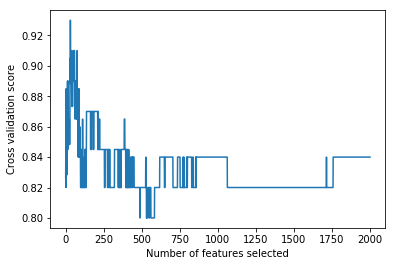

In [122]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [123]:
rfecv.support_

array([False, False, False, ..., False, False, False])

In [124]:
svc.fit(X_train[:,rfecv.support_],y_train)
svc.score(X_test[:,rfecv.support_],y_test)

0.9230769230769231

Performance score of about 92%